# **Install and import Dependencies**

In [1]:
!pip install mlxtend
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 19.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=a6d2f80a3de5f73884d7e5011ddf446d02ad99725ba3917ccf132685758024ac
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=0633a4c758b0120ded9e1f97609b46f18d7643e6c7c2bfa0ac05125a7bf534f8
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


# **Load Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('/content/gdrive/MyDrive/Colab Notebooks/Fonts/k2d-regular.ttf')
mpl.rc('font', family='k2d', size=12, weight=200)

In [5]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

--2021-12-27 02:29:57--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-12-27 02:29:57--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.01s   

2021-12-27 02:29:58 (9.81 MB/s) 

In [6]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/์NIDA Class/BADS7105 CRM/CLV3 (week9) Cross-selling models/Customer Preference Survey (Responses) - Form Responses 1.csv', encoding='utf-8')

In [7]:
df.head()

,Timestamp,โปรแกรมแท้,เครื่องซักผ้า,NONE,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,10/28/2021 14:05:59,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,10/28/2021 14:06:18,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
2,10/28/2021 14:06:20,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/28/2021 14:06:21,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,10/28/2021 14:06:23,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               29 non-null     object
 1   โปรแกรมแท้                              15 non-null     object
 2   เครื่องซักผ้า                           15 non-null     object
 3   NONE                                    17 non-null     object
 4   รองเท้าวิ่ง                             29 non-null     object
 5   ผักกรอบ                                 29 non-null     object
 6   คอร์สเรียนเสริม                         29 non-null     object
 7   nintendo switch                         29 non-null     object
 8   BTC (Bitcoin)                           29 non-null     object
 9   mechanical keyboard                     29 non-null     object
 10  เครื่องดูดฝุ่น Dyson                    29 non-null     object
 11  เคส ipad

#**Cleaning Data**

In [9]:
#Check missing
missing = df.isnull().sum()   #check missing value + count null => missing (variable)
print(missing)

Timestamp                                  0
โปรแกรมแท้                                14
เครื่องซักผ้า                             14
NONE                                      12
รองเท้าวิ่ง                                0
ผักกรอบ                                    0
คอร์สเรียนเสริม                            0
nintendo switch                            0
BTC (Bitcoin)                              0
mechanical keyboard                        0
เครื่องดูดฝุ่น Dyson                       0
เคส ipad                                   0
คุณเคยซื้อโต๊ะปรับระดับหรือไม่             0
สินค้าจากพิมรี่พาย                         0
I PHONE 13                                 0
หูฟัง bluetooth (airpods,truewireless)     0
แก้วน้ำ Starbucks                          1
เบาะรองนั่ง                                0
เครื่องชงกาแฟแคปซูล                        0
ตั๋วเครื่องบินไปญี่ปุ่น                    0
Ebook                                      0
ตู้เย็น                                    0
กล้องฟิล์ม

In [10]:
df.columns

Index(['Timestamp', 'โปรแกรมแท้', 'เครื่องซักผ้า', 'NONE', 'รองเท้าวิ่ง',
       'ผักกรอบ', 'คอร์สเรียนเสริม', 'nintendo switch', 'BTC (Bitcoin)',
       'mechanical keyboard', 'เครื่องดูดฝุ่น Dyson', 'เคส ipad',
       'คุณเคยซื้อโต๊ะปรับระดับหรือไม่', 'สินค้าจากพิมรี่พาย', 'I PHONE 13',
       'หูฟัง bluetooth (airpods,truewireless)', 'แก้วน้ำ Starbucks',
       'เบาะรองนั่ง', 'เครื่องชงกาแฟแคปซูล', 'ตั๋วเครื่องบินไปญี่ปุ่น',
       'Ebook', 'ตู้เย็น', 'กล้องฟิล์ม', 'เครื่องดนตรี', 'whey protein',
       'วัตถุมงคล ', 'กระบองเพชรพูดได้', 'ROV Skin'],
      dtype='object')

In [11]:
df = df.drop('NONE',1)
df = df.drop('Timestamp',1)
df = df.drop('โปรแกรมแท้',1)
df = df.drop('เครื่องซักผ้า',1)
df = df.drop('I PHONE 13',1)
df = df.drop('ตู้เย็น',1)
df = df.fillna(0)

In [12]:
df

,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
2,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
5,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
6,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
7,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
8,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
9,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [13]:
#Check missing
missing = df.isnull().sum()   
print(missing)

รองเท้าวิ่ง                               0
ผักกรอบ                                   0
คอร์สเรียนเสริม                           0
nintendo switch                           0
BTC (Bitcoin)                             0
mechanical keyboard                       0
เครื่องดูดฝุ่น Dyson                      0
เคส ipad                                  0
คุณเคยซื้อโต๊ะปรับระดับหรือไม่            0
สินค้าจากพิมรี่พาย                        0
หูฟัง bluetooth (airpods,truewireless)    0
แก้วน้ำ Starbucks                         0
เบาะรองนั่ง                               0
เครื่องชงกาแฟแคปซูล                       0
ตั๋วเครื่องบินไปญี่ปุ่น                   0
Ebook                                     0
กล้องฟิล์ม                                0
เครื่องดนตรี                              0
whey protein                              0
วัตถุมงคล                                 0
กระบองเพชรพูดได้                          0
ROV Skin                                  0
dtype: int64


#**Prepare data for apriori using one-hot encoding & Turn float into integer**

In [14]:
def encode_units(x):
    if x == "ไม่เคยซื้อ":
        return 0
    if x == "ไม่เคย":
        return 0
    if x == "เคยซื้อ":
        return 1
    if x == "เคย":
        return 1
hot_encoded_df = df.applymap(encode_units).fillna(0)
# hot_encoded_df = hot_encoded_df.drop(["Timestamp","NONE"], axis=1)
hot_encoded_df = hot_encoded_df.astype("int64")

In [15]:
hot_encoded_df.head()

,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1,1,0,1,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1
2,1,0,1,0,1,0,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,1,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0
4,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0


In [16]:
hot_encoded_df.melt()['value'].value_counts(dropna=False)

0    398
1    240
Name: value, dtype: int64

In [17]:
rename_column = ['running shoes', 'crispy vegetables',
       'Additional courses', 'nintendo switch', 'BTC (Bitcoin)',
       'mechanical keyboard', 'Dyson vacuum cleaner ', 'ipad case',
       'adjustable table', '''Pimrypie's Product''',
       'bluetooth earphones(airpods,truewireless)', 'Starbucks glass',
       'seat cushion', 'capsule coffee machine', 'Airfare to Japan',
       'Ebook', 'film camera', 'musical instrument', 'whey protein',
       'Talisman ', 'dancing cactus', 'ROV Skin']

hot_encoded_df = hot_encoded_df.set_axis(rename_column, axis=1, inplace=False)
print(hot_encoded_df)

    running shoes  crispy vegetables  ...  dancing cactus  ROV Skin
0               1                  1  ...               0         0
1               1                  0  ...               0         1
2               1                  0  ...               0         0
3               1                  0  ...               0         0
4               1                  1  ...               0         0
5               1                  0  ...               0         1
6               1                  1  ...               0         0
7               1                  0  ...               0         1
8               1                  1  ...               0         0
9               1                  0  ...               0         0
10              1                  0  ...               0         0
11              1                  1  ...               0         0
12              1                  1  ...               0         0
13              1                  0  ...       

# **Top 10 items**

In [18]:
hot_encoded_df.sum().sort_values(ascending=False).head(10)

running shoes                                28
Additional courses                           27
ipad case                                    26
bluetooth earphones(airpods,truewireless)    22
Ebook                                        19
musical instrument                           16
seat cushion                                 16
BTC (Bitcoin)                                13
crispy vegetables                            10
Airfare to Japan                              9
dtype: int64

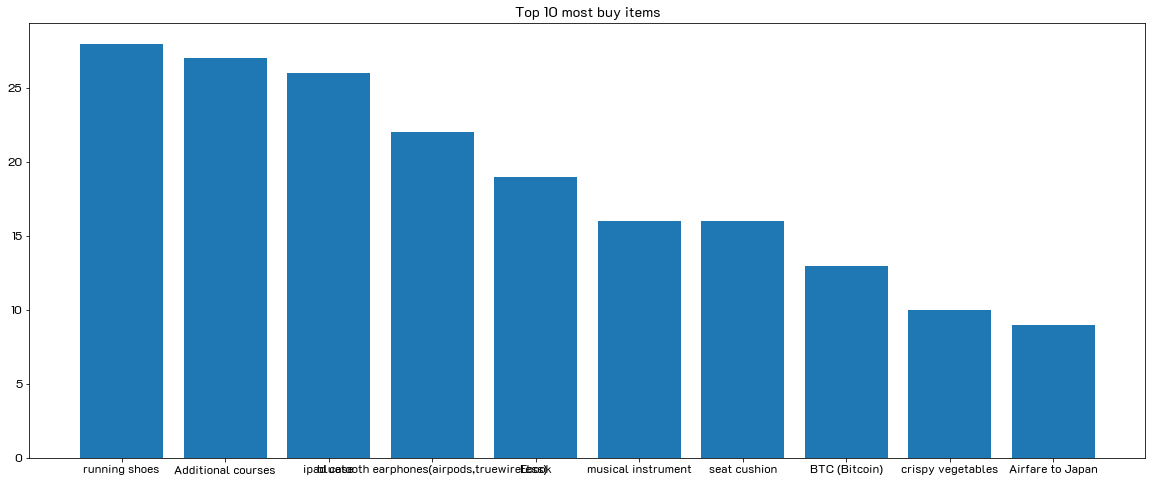

In [19]:
df_for_top10_Items = hot_encoded_df.sum().sort_values(ascending=False).head(10)
Item_array = np.arange(len(df_for_top10_Items))

plt.figure(figsize=(20,8))
Items_name=['running shoes', 'Additional courses', 'ipad case', 'bluetooth earphones(airpods,truewireless)', 
            'Ebook', 'musical instrument', 'seat cushion', 'BTC (Bitcoin)', 'crispy vegetables', 'Airfare to Japan']

plt.bar(Item_array,df_for_top10_Items.iloc[:])
plt.xticks(Item_array, Items_name)
plt.title('Top 10 most buy items')
plt.show()

# **EDA**

In [20]:
hot_encoded_df.describe().T.sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
running shoes,29.0,0.965517,0.185695,0.0,1.0,1.0,1.0,1.0
Additional courses,29.0,0.931034,0.257881,0.0,1.0,1.0,1.0,1.0
ipad case,29.0,0.896552,0.309934,0.0,1.0,1.0,1.0,1.0
"bluetooth earphones(airpods,truewireless)",29.0,0.758621,0.435494,0.0,1.0,1.0,1.0,1.0
Ebook,29.0,0.655172,0.483725,0.0,0.0,1.0,1.0,1.0
musical instrument,29.0,0.551724,0.506120,0.0,0.0,1.0,1.0,1.0
seat cushion,29.0,0.551724,0.506120,0.0,0.0,1.0,1.0,1.0
BTC (Bitcoin),29.0,0.448276,0.506120,0.0,0.0,0.0,1.0,1.0
crispy vegetables,29.0,0.344828,0.483725,0.0,0.0,0.0,1.0,1.0
Airfare to Japan,29.0,0.310345,0.470824,0.0,0.0,0.0,1.0,1.0


# **Purchase/Usage Ranking**

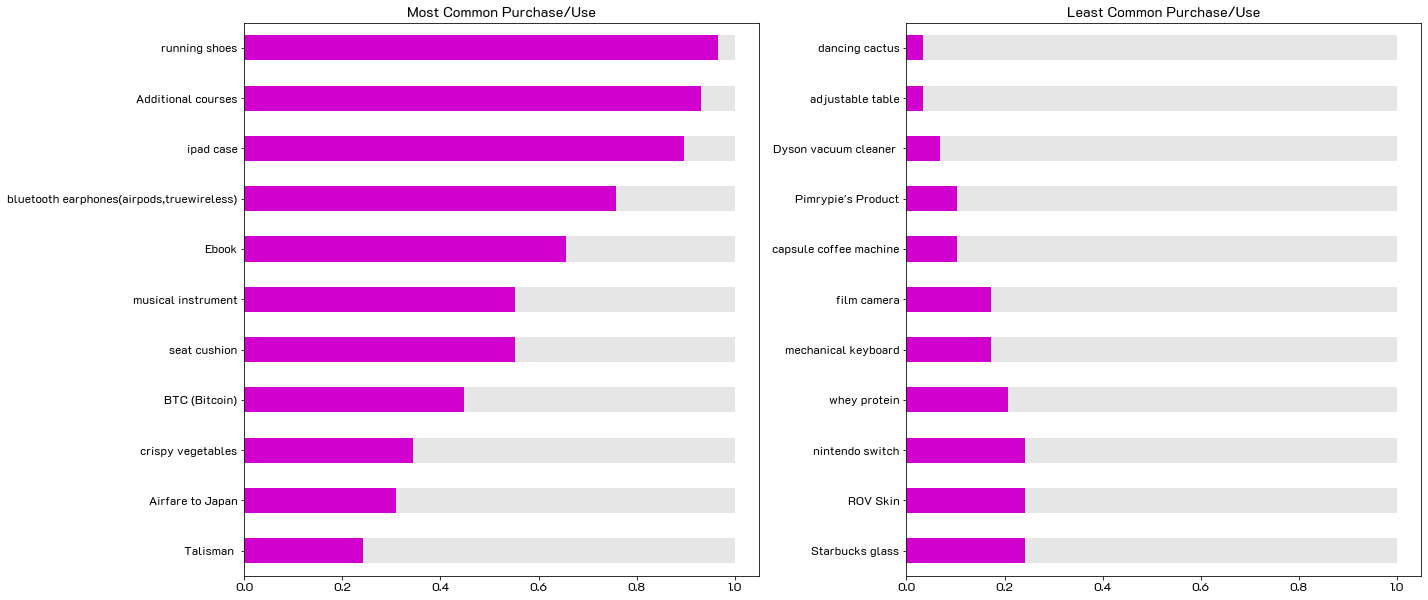

In [21]:
# hot_encoded_df
temp = hot_encoded_df.mean().sort_values().to_frame().rename({0:'yes'}, axis=1)
temp['no'] = 1 - temp['yes']

fig, axes = plt.subplots(1,2, figsize=(20,8.5), tight_layout=True)
# colors = ['darkturquoise','.9'] ##D100CE
colors = ['#D100CE','.9']
temp[11:].plot.barh(stacked=True, color=colors, ax=axes[0], title='Most Common Purchase/Use', legend=False)
temp[:11].sort_values('yes', ascending=False).plot.barh(stacked=True, color=colors, ax=axes[1], title='Least Common Purchase/Use', legend=False)
# plt.savefig('plots/usage.png',dpi=120)
plt.show()

# **Item Count per User**

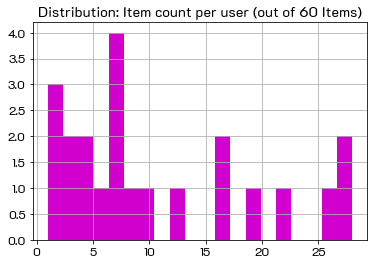

In [22]:
hot_encoded_df.sum().hist(bins=20, color='#D100CE')
plt.title('Distribution: Item count per user (out of 60 Items)')
plt.show()

In [23]:
hot_encoded_df = hot_encoded_df.iloc[:,:].reset_index(drop=True).rename_axis('No.')
hot_encoded_df.head()

,running shoes,crispy vegetables,Additional courses,nintendo switch,BTC (Bitcoin),mechanical keyboard,Dyson vacuum cleaner,ipad case,adjustable table,Pimrypie's Product,"bluetooth earphones(airpods,truewireless)",Starbucks glass,seat cushion,capsule coffee machine,Airfare to Japan,Ebook,film camera,musical instrument,whey protein,Talisman,dancing cactus,ROV Skin
No.,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1,1,0,1,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1
2,1,0,1,0,1,0,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,1,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0
4,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0


# **Market Basket Analysis**

## **Frequent Itemsets & Association Rules (Determine product association using apriori)**

In [24]:
frequent_itemsets = apriori(hot_encoded_df, min_support=0.5, use_colnames=True)

#**List out rules**

In [25]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(bluetooth earphones(airpods,truewireless))",(running shoes),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf
1,(running shoes),"(bluetooth earphones(airpods,truewireless))",0.965517,0.758621,0.758621,0.785714,1.035714,0.026159,1.126437
2,(running shoes),(Ebook),0.965517,0.655172,0.655172,0.678571,1.035714,0.022592,1.072797
3,(Ebook),(running shoes),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf
4,(seat cushion),(Additional courses),0.551724,0.931034,0.551724,1.000000,1.074074,0.038050,inf
...,...,...,...,...,...,...,...,...,...
103,"(Additional courses, ipad case)","(Ebook, running shoes)",0.827586,0.655172,0.586207,0.708333,1.081140,0.043995,1.182266
104,(Ebook),"(running shoes, Additional courses, ipad case)",0.655172,0.793103,0.586207,0.894737,1.128146,0.066587,1.965517
105,(running shoes),"(Ebook, Additional courses, ipad case)",0.965517,0.586207,0.586207,0.607143,1.035714,0.020214,1.053292
106,(Additional courses),"(Ebook, ipad case, running shoes)",0.931034,0.620690,0.586207,0.629630,1.014403,0.008323,1.024138


#**Filter rules**

In [26]:
# filter Rules
rules[(rules['lift'] >= 1) &             #ปรับ 1.1 หรือ อื่นๆ 
      (rules['confidence'] >= 0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(bluetooth earphones(airpods,truewireless))",(running shoes),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf
1,(running shoes),"(bluetooth earphones(airpods,truewireless))",0.965517,0.758621,0.758621,0.785714,1.035714,0.026159,1.126437
3,(Ebook),(running shoes),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf
4,(seat cushion),(Additional courses),0.551724,0.931034,0.551724,1.000000,1.074074,0.038050,inf
6,(Ebook),(Additional courses),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345
...,...,...,...,...,...,...,...,...,...
98,"(Ebook, running shoes)","(Additional courses, ipad case)",0.655172,0.827586,0.586207,0.894737,1.081140,0.043995,1.637931
99,"(Ebook, Additional courses)","(running shoes, ipad case)",0.620690,0.862069,0.586207,0.944444,1.095556,0.051130,2.482759
100,"(Ebook, ipad case)","(running shoes, Additional courses)",0.620690,0.896552,0.586207,0.944444,1.053419,0.029727,1.862069
103,"(Additional courses, ipad case)","(Ebook, running shoes)",0.827586,0.655172,0.586207,0.708333,1.081140,0.043995,1.182266


In [62]:
# filter Rules
rules[(rules['lift'] >= 1) &             #ปรับ 1.1 หรือ อื่นๆ 
      (rules['confidence'] >= 0.65)][:50].sort_values(by=['lift', 'confidence', 'antecedent support'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
57,(seat cushion),"(Additional courses, ipad case)",0.551724,0.827586,0.551724,1.000000,1.208333,0.095125,inf
56,"(Additional courses, ipad case)",(seat cushion),0.827586,0.551724,0.551724,0.666667,1.208333,0.095125,1.344828
12,(seat cushion),(ipad case),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
16,(musical instrument),(ipad case),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
54,"(seat cushion, Additional courses)",(ipad case),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
38,"(seat cushion, running shoes)",(ipad case),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
48,"(running shoes, musical instrument)",(ipad case),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
43,"(running shoes, ipad case)",(Ebook),0.862069,0.655172,0.620690,0.720000,1.098947,0.055886,1.231527
46,(Ebook),"(running shoes, ipad case)",0.655172,0.862069,0.620690,0.947368,1.098947,0.055886,2.620690
40,(seat cushion),"(running shoes, ipad case)",0.551724,0.862069,0.517241,0.937500,1.087500,0.041617,2.206897


In [66]:
# filter Rules
rules[(rules['lift'] >= 1) &             #ปรับ 1.1 หรือ อื่นๆ 
      (rules['confidence'] >= 0.65)][:50].sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
57,(seat cushion),"(Additional courses, ipad case)",0.551724,0.827586,0.551724,1.000000,1.208333,0.095125,inf
56,"(Additional courses, ipad case)",(seat cushion),0.827586,0.551724,0.551724,0.666667,1.208333,0.095125,1.344828
48,"(running shoes, musical instrument)",(ipad case),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
16,(musical instrument),(ipad case),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
38,"(seat cushion, running shoes)",(ipad case),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
54,"(seat cushion, Additional courses)",(ipad case),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
12,(seat cushion),(ipad case),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
43,"(running shoes, ipad case)",(Ebook),0.862069,0.655172,0.620690,0.720000,1.098947,0.055886,1.231527
46,(Ebook),"(running shoes, ipad case)",0.655172,0.862069,0.620690,0.947368,1.098947,0.055886,2.620690
40,(seat cushion),"(running shoes, ipad case)",0.551724,0.862069,0.517241,0.937500,1.087500,0.041617,2.206897


#**Visualize rules**

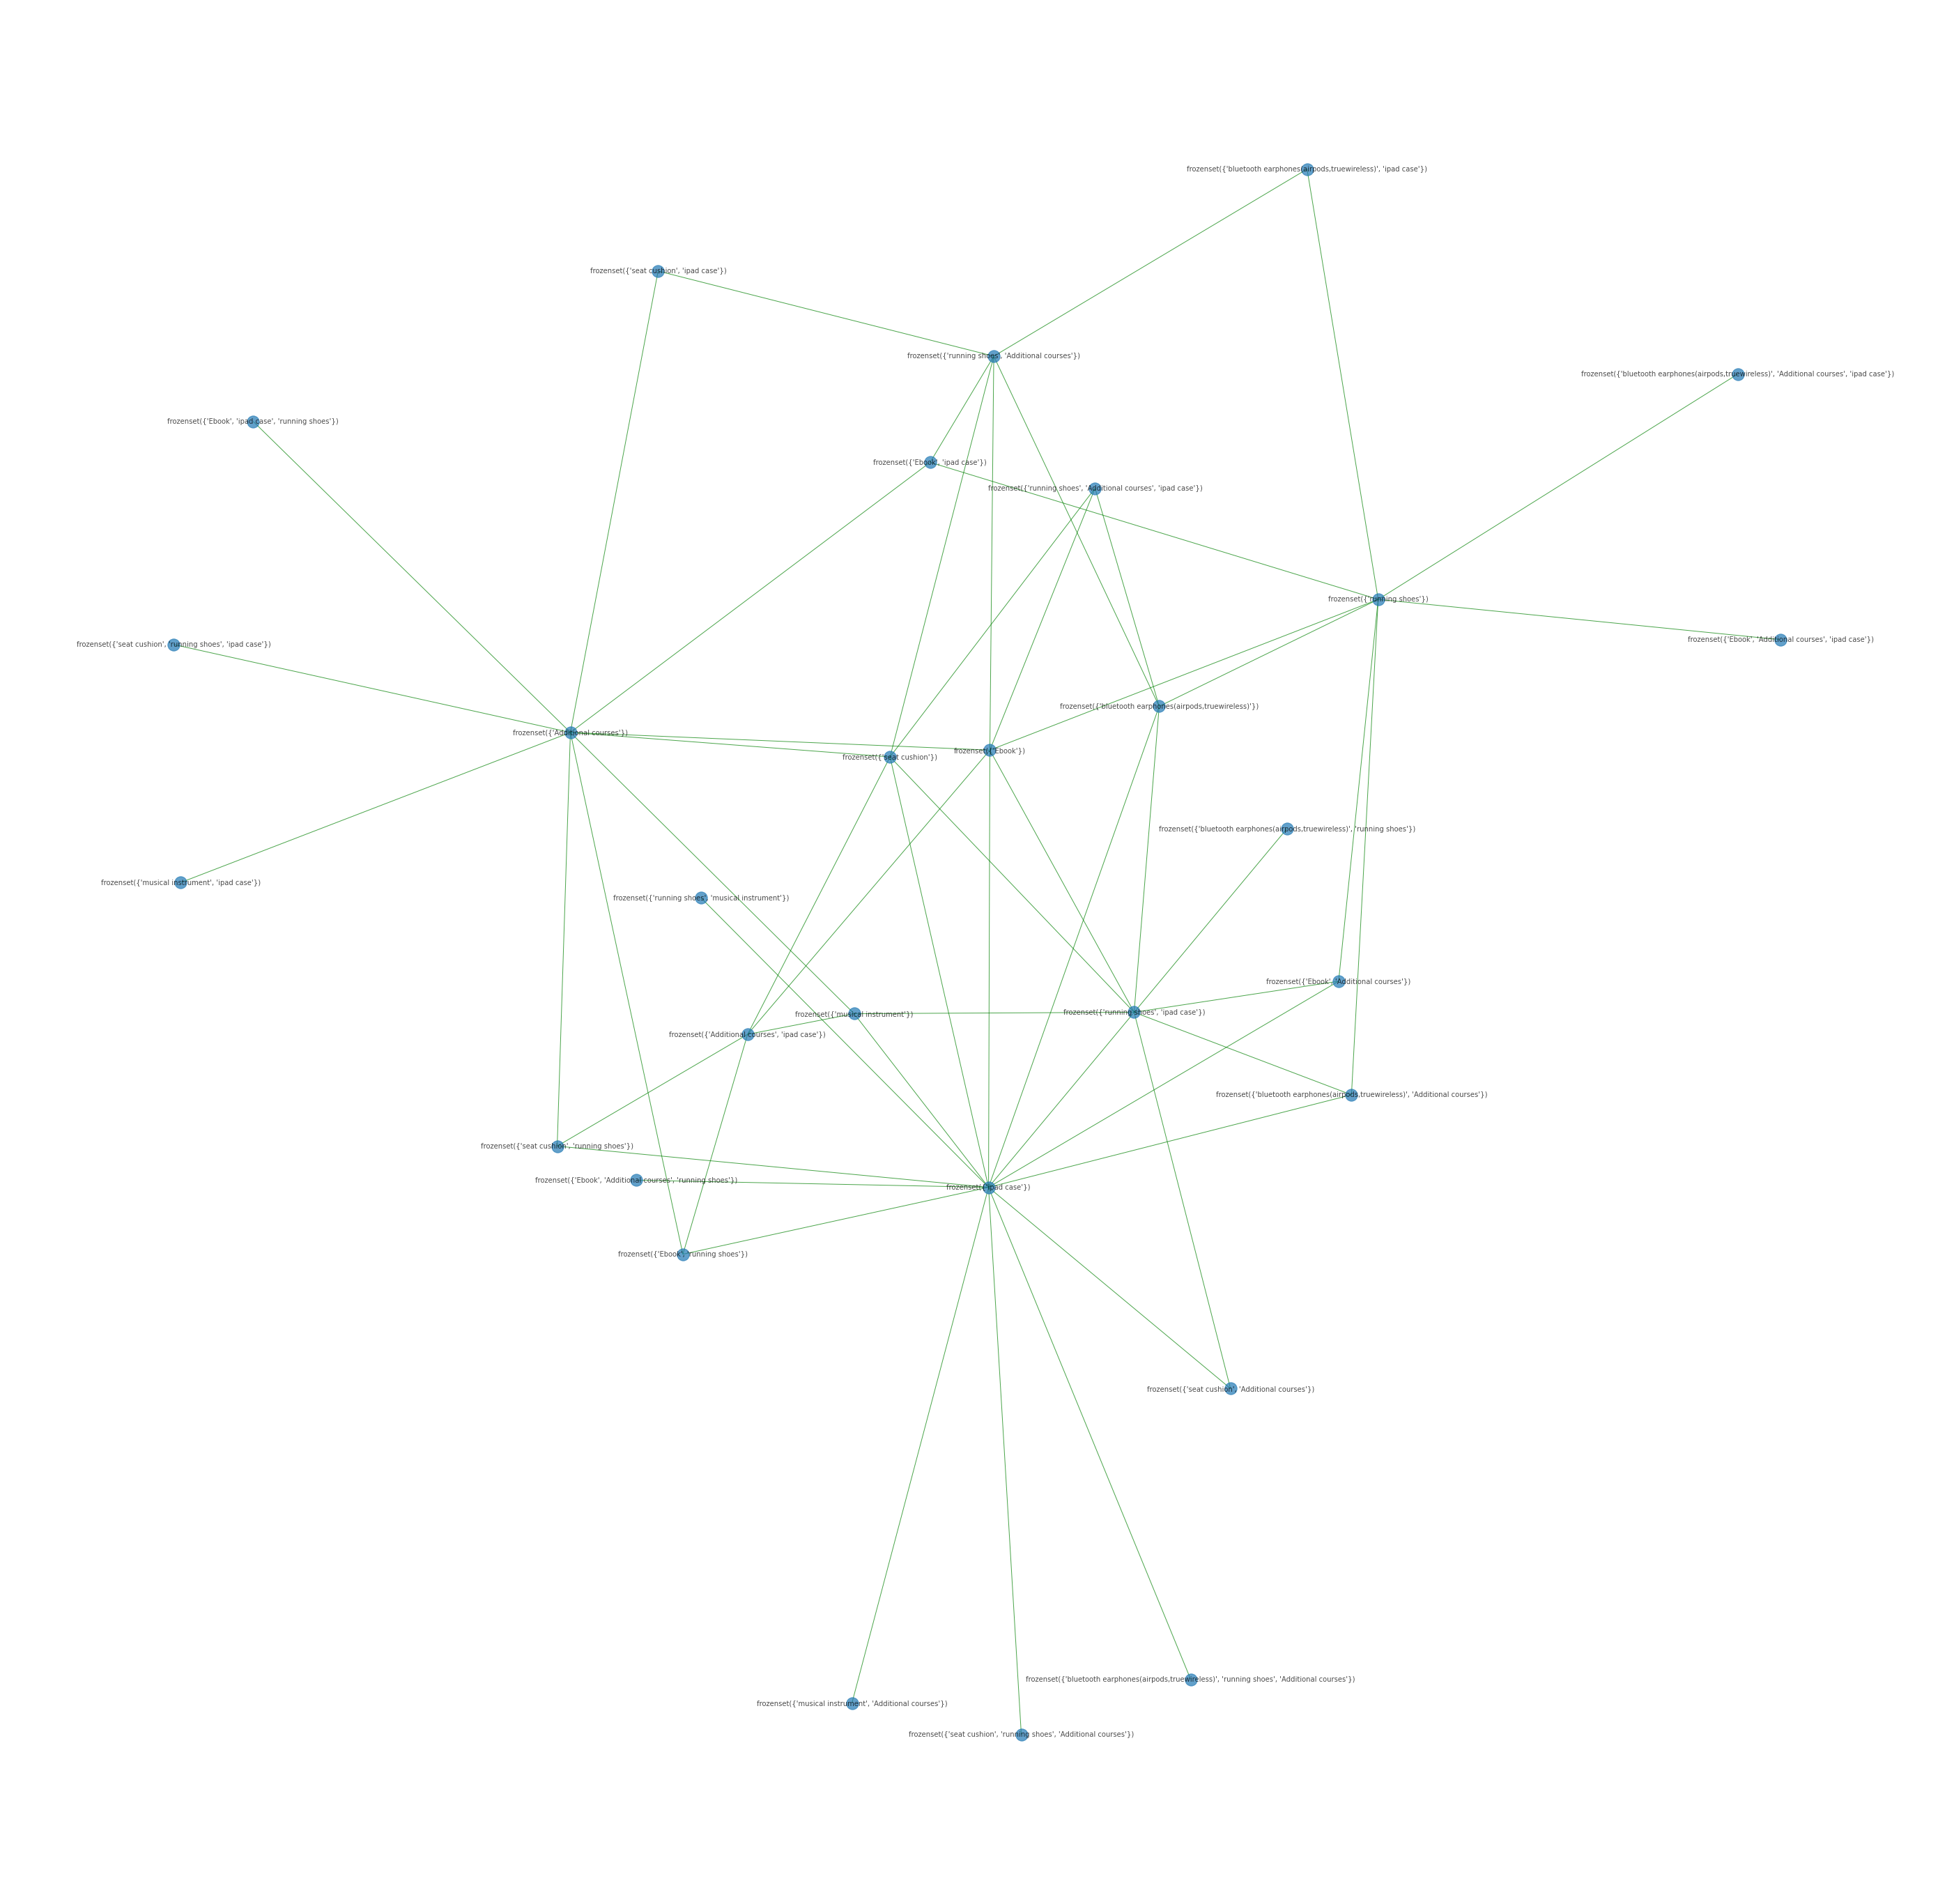

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(50,50))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,alpha = 0.7,node_size = 300,font_size=10,edge_color='g')
plt.show()

In [28]:
# Recommend 1 item based on 2 times
rules[(rules['antecedents'].apply(len) ==2) & (rules['consequents'].apply(len) == 1)].sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
56,"(Additional courses, ipad case)",(seat cushion),0.827586,0.551724,0.551724,0.666667,1.208333,0.095125,1.344828
67,"(Additional courses, ipad case)",(musical instrument),0.827586,0.551724,0.517241,0.625000,1.132812,0.060642,1.195402
54,"(seat cushion, Additional courses)",(ipad case),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
48,"(running shoes, musical instrument)",(ipad case),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
66,"(musical instrument, Additional courses)",(ipad case),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
38,"(seat cushion, running shoes)",(ipad case),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
43,"(running shoes, ipad case)",(Ebook),0.862069,0.655172,0.620690,0.720000,1.098947,0.055886,1.231527
39,"(running shoes, ipad case)",(seat cushion),0.862069,0.551724,0.517241,0.600000,1.087500,0.041617,1.120690
49,"(running shoes, ipad case)",(musical instrument),0.862069,0.551724,0.517241,0.600000,1.087500,0.041617,1.120690
62,"(Additional courses, ipad case)",(Ebook),0.827586,0.655172,0.586207,0.708333,1.081140,0.043995,1.182266


In [29]:
# Recommend 1 item based on 3 items
rules[(rules['antecedents'].apply(len) == 3) & (rules['consequents'].apply(len) == 1)].sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
84,"(running shoes, Additional courses, ipad case)",(seat cushion),0.793103,0.551724,0.517241,0.652174,1.182065,0.079667,1.288793
97,"(running shoes, Additional courses, ipad case)",(Ebook),0.793103,0.655172,0.586207,0.739130,1.128146,0.066587,1.321839
82,"(seat cushion, running shoes, Additional courses)",(ipad case),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
83,"(seat cushion, running shoes, ipad case)",(Additional courses),0.517241,0.931034,0.517241,1.000000,1.074074,0.035672,inf
94,"(Ebook, Additional courses, running shoes)",(ipad case),0.620690,0.896552,0.586207,0.944444,1.053419,0.029727,1.862069
73,"(bluetooth earphones(airpods,truewireless), Ad...",(running shoes),0.620690,0.965517,0.620690,1.000000,1.035714,0.021403,inf
96,"(Ebook, Additional courses, ipad case)",(running shoes),0.586207,0.965517,0.586207,1.000000,1.035714,0.020214,inf
74,"(running shoes, Additional courses, ipad case)","(bluetooth earphones(airpods,truewireless))",0.793103,0.758621,0.620690,0.782609,1.031621,0.019025,1.110345
95,"(Ebook, ipad case, running shoes)",(Additional courses),0.620690,0.931034,0.586207,0.944444,1.014403,0.008323,1.241379
72,"(bluetooth earphones(airpods,truewireless), ru...",(ipad case),0.689655,0.896552,0.620690,0.900000,1.003846,0.002378,1.034483


In [30]:
simple_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1) & (rules['lift'] >= 1.0) & (rules['confidence'] > 0.7)]
print(simple_rules.shape)
simple_rules.sort_values('lift', ascending=False).head(20)


(11, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(seat cushion),(ipad case),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
16,(musical instrument),(ipad case),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
4,(seat cushion),(Additional courses),0.551724,0.931034,0.551724,1.000000,1.074074,0.038050,inf
14,(Ebook),(ipad case),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
0,"(bluetooth earphones(airpods,truewireless))",(running shoes),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf
1,(running shoes),"(bluetooth earphones(airpods,truewireless))",0.965517,0.758621,0.758621,0.785714,1.035714,0.026159,1.126437
3,(Ebook),(running shoes),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf
6,(Ebook),(Additional courses),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345
11,(ipad case),"(bluetooth earphones(airpods,truewireless))",0.896552,0.758621,0.689655,0.769231,1.013986,0.009512,1.045977
10,"(bluetooth earphones(airpods,truewireless))",(ipad case),0.758621,0.896552,0.689655,0.909091,1.013986,0.009512,1.137931


In [31]:
edgelist = []
for i,x in simple_rules.iterrows():
    n1, = x['antecedents']
    n2, = x['consequents']
    attr = { 'lift': round(x['lift'],4), 'confidence' : round(x['confidence'],4) }
    edgelist.append((n1,n2,attr))

nodes = { n1 for n1, n2, attr in edgelist}.union({ n2 for n1, n2, attr in edgelist})

support_df = frequent_itemsets[frequent_itemsets['itemsets'].apply(len)==1].copy()
support_df['item'] = support_df['itemsets'].apply(lambda x: list(x)[0])
support_df = support_df[support_df['item'].isin(nodes)]

nodelist = []
for i,x in support_df.iterrows():
    n = x['item']
    attr = { 'support' : round(x['support'],4) }
    nodelist.append((n, attr))

# create graph
G = nx.DiGraph()

G.add_nodes_from(nodelist)
G.add_edges_from(edgelist)

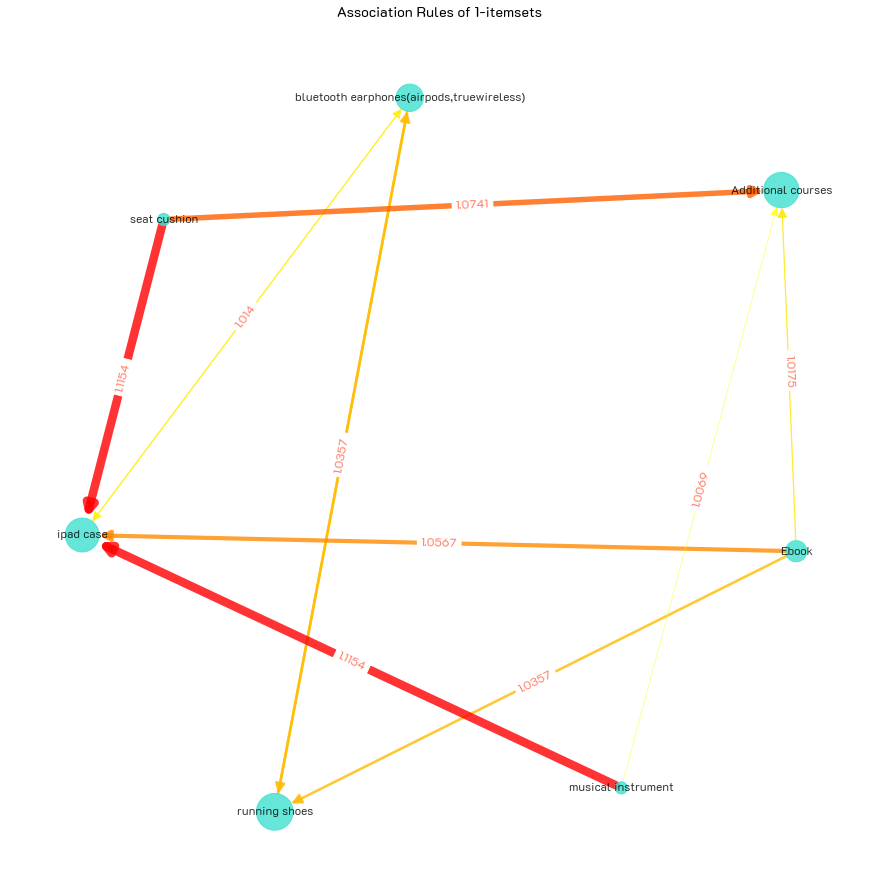

In [32]:
nodeliip

In [33]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)  
#สร้าง dataframe เปล่าๆ  ให้index เป็นตามชื่อ column (ใน hot_encoded_df => rows คือ transaction ชื่อ column คือ item ทั้งหมด) ในที่นี้เราดึงชื่อ column มาแปะไว้ที่ index, และแปะไว้ที่ column จะได้ symmetrical matrix เป็น item cross กับ item

In [34]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :  #index แรกของ item => a 
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :   #for loop คู่สินค้า (a,a), (a,b), (a,c),....จนครบคุ่แล้วมา cross dot matrix กันได้ cosine sim
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

In [35]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [36]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

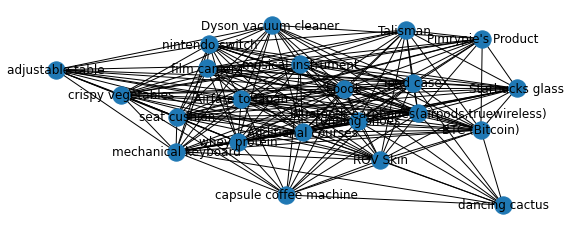

In [37]:
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True)
plt.show()

Graph with 22 nodes and 193 edges


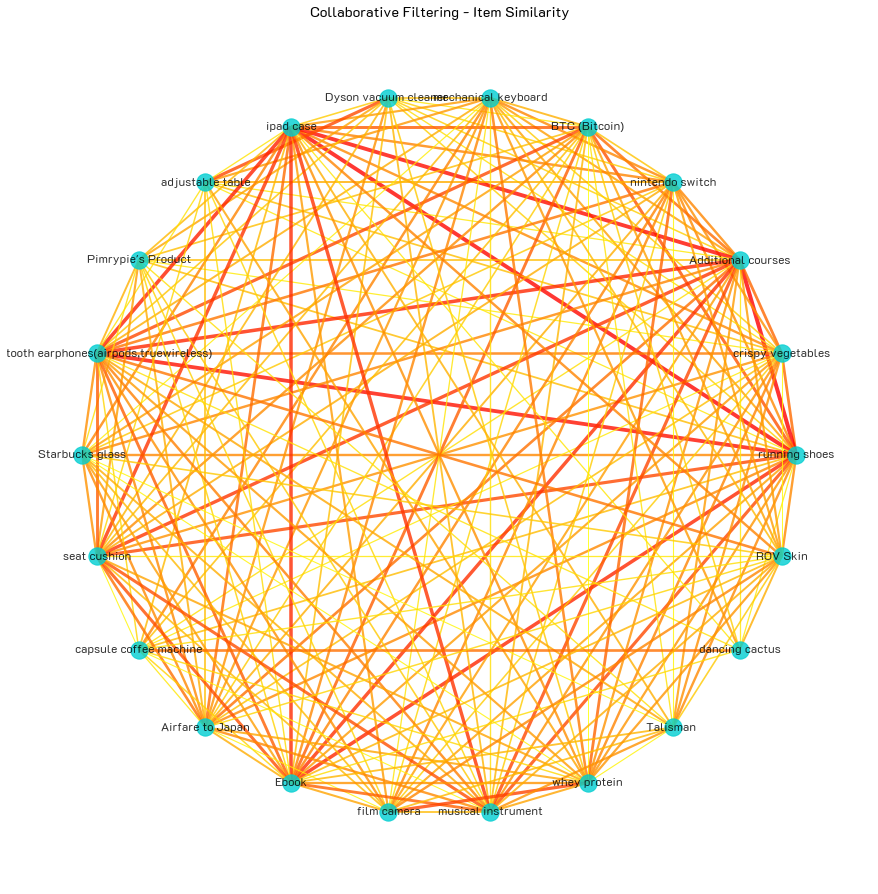

In [38]:
G = nx.Graph()
G.add_weighted_edges_from([ (x['item'],x['related item'], round(x['value'],2)) for i,x in links_filtered.iterrows()])
print(nx.info(G))
labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':12}

edgelist, weights = zip(*[((u,v), d['weight'])for u,v,d in G.edges(data=True)])
width = 1 + ((np.array(weights) - min(weights)) / (max(weights) - min(weights)))*3

plt.figure(figsize=(12,12))
pos = nx.circular_layout(G, scale=5)
nx.draw(G, pos, with_labels=True, node_color='darkturquoise', 
        edgelist=edgelist, width=width, 
        edge_color=weights, edge_cmap=plt.cm.autumn_r,
        **labels_params)
plt.title('Collaborative Filtering - Item Similarity')
# plt.savefig('./plots/item_sim.png', dpi=120)
plt.show()

# **Matrix Factorization**

In [39]:
from sklearn.decomposition import NMF

# X = df.drop(['ครีมกันแดด','กระเป๋า','ชาบู'],axis=1) # remove items that all users use
X = hot_encoded_df
n_factors = 12

nmf = NMF(n_factors, random_state=48)
W = nmf.fit_transform(X)
H = nmf.components_
print(f'Reconstruction error: {nmf.reconstruction_err_}')

# reconstruct rating matrix -> recommendation 
rec_df = pd.DataFrame(W @ H, columns=X.columns, index=X.index)
rec_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


Reconstruction error: 3.9167658488508783


,running shoes,crispy vegetables,Additional courses,nintendo switch,BTC (Bitcoin),mechanical keyboard,Dyson vacuum cleaner,ipad case,adjustable table,Pimrypie's Product,"bluetooth earphones(airpods,truewireless)",Starbucks glass,seat cushion,capsule coffee machine,Airfare to Japan,Ebook,film camera,musical instrument,whey protein,Talisman,dancing cactus,ROV Skin
No.,,,,,,,,,,,,,,,,,,,,,,
0,1.023177,0.772867,0.926396,0.035533,0.008398,0.115284,0.000000,0.791049,0.000000,0.014988,0.440387,0.103493,0.207617,0.120288,0.006815,0.865150,0.061365,1.124511,0.027271,1.071922,0.051205,0.036055
1,1.003177,0.177721,0.885980,0.924136,0.967341,0.513923,0.012400,1.231210,0.019935,0.000000,1.103132,0.037127,0.799365,0.295083,0.253457,1.016057,1.059947,0.211592,1.055024,0.000000,0.148808,0.773109
2,0.906590,0.106835,1.084343,0.031971,1.071484,0.009123,0.041541,0.972180,0.000782,0.133168,0.776737,0.799715,0.970216,0.004892,1.074658,0.356446,0.055718,0.975212,0.051077,0.038585,0.021551,0.283115
3,0.975244,0.274202,0.882435,0.008282,1.001207,0.168621,0.508130,1.131111,0.243942,0.913087,1.062280,0.226122,1.236809,0.021483,0.792794,0.721668,0.177674,0.902498,0.308474,0.241851,0.000000,0.011186
4,0.884266,0.824389,1.067151,0.073959,0.000857,0.025436,0.210157,0.884965,0.001172,1.017355,1.147694,0.062047,1.002970,0.036334,0.743452,0.042232,0.167995,0.298891,0.025173,0.321738,0.005227,0.000000


In [40]:
rating_df = hot_encoded_df.reset_index().melt(id_vars='No.') \
    .merge(rec_df.reset_index().melt(id_vars='No.'), left_on=['No.','variable'], right_on=['No.','variable']) \
    .rename({'variable':'item', 'value_x' : 'r', 'value_y' : 'r_pred' }, axis=1) 
rating_df

,No.,item,r,r_pred
0,0,running shoes,1,1.023177
1,1,running shoes,1,1.003177
2,2,running shoes,1,0.906590
3,3,running shoes,1,0.975244
4,4,running shoes,1,0.884266
...,...,...,...,...
633,24,ROV Skin,0,0.564394
634,25,ROV Skin,0,0.008137
635,26,ROV Skin,1,0.920841
636,27,ROV Skin,1,0.987549


In [41]:
rating_df[:10]

,No.,item,r,r_pred
0,0,running shoes,1,1.023177
1,1,running shoes,1,1.003177
2,2,running shoes,1,0.906590
3,3,running shoes,1,0.975244
4,4,running shoes,1,0.884266
5,5,running shoes,1,0.992591
6,6,running shoes,1,0.992855
7,7,running shoes,1,1.002441
8,8,running shoes,1,1.054211
9,9,running shoes,1,0.972810


# **Recommended item for each user**

In [42]:
# recommendation is the not-purchased items with the highest predicted rating
rec_items = rating_df[rating_df['r']==0].sort_values(['No.','r_pred'], ascending=False).groupby('No.').nth(0)
rec_items

,item,r,r_pred
No.,,,
0,"bluetooth earphones(airpods,truewireless)",0,0.440387
1,capsule coffee machine,0,0.295083
2,Ebook,0,0.356446
3,whey protein,0,0.308474
4,Talisman,0,0.321738
5,Additional courses,0,0.492893
6,ipad case,0,0.164646
7,Ebook,0,0.272826
8,Talisman,0,0.421662


In [43]:
import umap

temp = pd.DataFrame(np.vstack([W, H.T]))
temp.shape

reducer = umap.UMAP()
embed = reducer.fit_transform(temp)
embed.shape

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(51, 2)

In [44]:
latent_df = pd.DataFrame(embed, columns=['x','y'])
latent_df['type'] = ['user'] * W.shape[0] + ['item'] * H.shape[1]
latent_df['label'] = list(X.index) + list(X.columns)

latent_df

,x,y,type,label
0,6.336194,-2.353221,user,0
1,2.442417,-3.203323,user,1
2,2.158448,-2.214907,user,2
3,3.972885,-3.799332,user,3
4,4.535630,-3.992518,user,4
5,1.104616,-3.161572,user,5
6,5.698616,-2.661075,user,6
7,1.381813,-2.809600,user,7
8,4.852769,-2.357573,user,8
9,2.630498,-2.121971,user,9


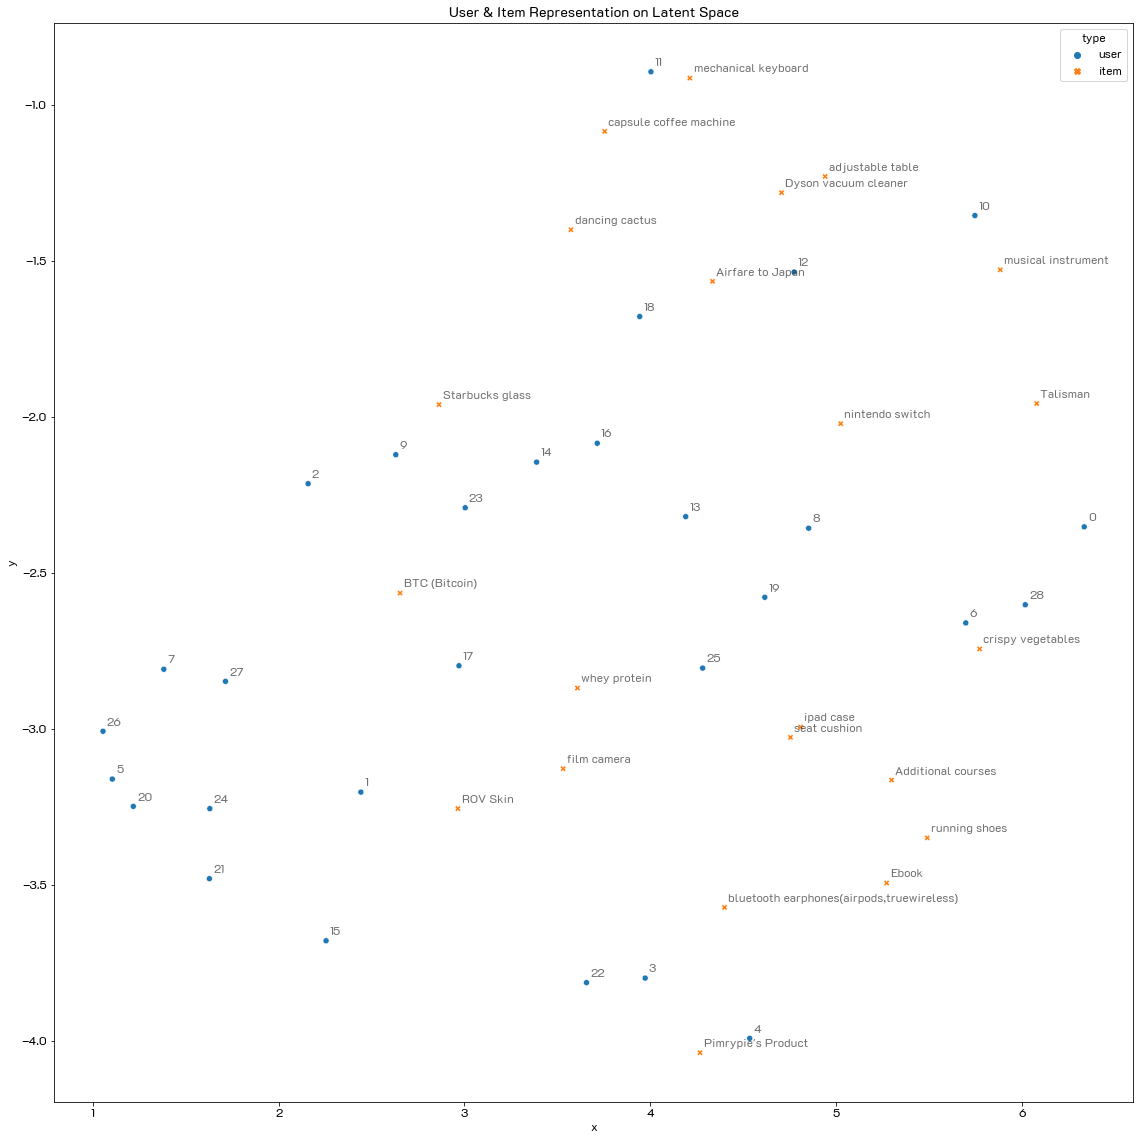

In [45]:
plt.figure(figsize=(16,16), tight_layout=True)
sns.scatterplot(x='x', y='y', hue='type', data=latent_df, style='type')
for i,r in latent_df.iterrows():
    px, py, text = r['x'], r['y'], r['label']
    plt.annotate(text, (px+.02,py+.02), color='.2', alpha=.7)
plt.title('User & Item Representation on Latent Space')
# plt.savefig('./plots/user-item-latent-space.png', dpi=120)
plt.show()

สรุปผล

รองเท้าวิ่งกับหูฟังบลูทูธมักถูกซื้อด้วยกัน 
อีกอย่างที่ถูกซื้อคู่กันเยอะ คือ คอร์สเรียนเสริม	กับ เบาะรองนั่ง 	
ที่ดูไม่คุ้นเคย คือ เครื่องดนตรี กับ เคส ipad 